In [1]:
import numpy as np
from math import sin, cos, pi, sqrt, fabs

from numpy import complex128
import time
import pyfftw

In [2]:
Lmax = 5
N = 1024

In [86]:
a_coef = np.zeros((Lmax+1, Lmax+1))
b_coef = np.zeros((Lmax+1, Lmax+1))

a_coef[1][3] = 1.0

a_coef[0][0] = 0.0

# coefficient conditions
for m in xrange(0, Lmax + 1):
    for l in xrange(0, m):
        a_coef[m][l] = 0.0
for m in xrange(0, Lmax + 1):
    for l in xrange(0, m):
        b_coef[m][l] = 0.0
for l in xrange(0, Lmax + 1):
    b_coef[0][l] = 0.0

In [39]:
# P_
P_ = np.zeros((N/2, Lmax + 4, Lmax + 4))
for j in xrange(1, N/2):

    teta = 2 * pi * j / float(N) # teta from 0 to pi

    P_[j][0][0] = 1 / sqrt(4*pi)

    for m in xrange(1, Lmax + 4):
        P_[j][m][m] = P_[j][m - 1][m - 1] * (-sin(teta)) * sqrt(2 * m + 1) / sqrt(2 * m)

    for m in xrange(0, Lmax + 3):
        P_[j][m][m + 1] = P_[j][m][m] * cos(teta) * sqrt(2 * m + 3) 

    for m in xrange(0, Lmax + 2):
        for l in xrange(m + 2, Lmax + 4):
            P_[j][m][l] = sqrt(4*l*l-1)/sqrt(l*l-m*m)*cos(teta)*P_[j][m][l-1] - P_[j][m][l-2]*sqrt((2*l+1)*(l-1-m)*(l-m)*(l+m-1)/(l+m)/(2*l-3))
        
x = np.zeros((N, N / 2))
y = np.zeros((N, N / 2))

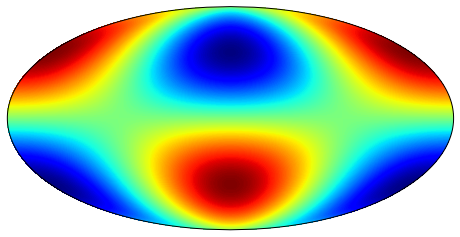

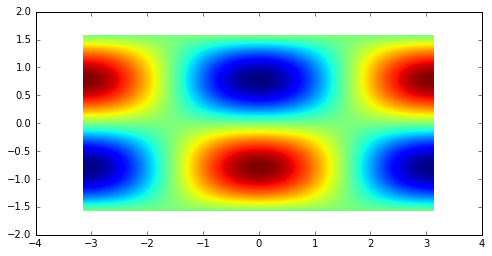

In [40]:
for j in xrange(0, N / 2):
    for i in xrange(0, N):
        x[i][j] = (2 * i - N) / float(N) * pi # x from -pi to pi
        y[i][j] = 2 * j / float(N) * pi - pi / 2 # y from -pi/2 to pi/2

field = np.zeros((N, N / 2))

for j in xrange(1, N / 2):

    theta = 2 * pi * j / float(N) # teta from 0 to pi

    F = complex128(np.zeros((N + 1)))
    F_ = complex128(np.zeros((N + 1)))

    func1 = 0.0
    func2 = 0.0

    for m in xrange(0, Lmax + 1):
        for l in xrange(m, Lmax + 1):
            func1 = func1 + a_coef[m][l] * P_[j][m][l]
            func2 = func2 + b_coef[m][l] * P_[j][m][l]

        F[m] = func1
        F_[m] = func2

        func1 = 0.0
        func2 = 0.0

    T = np.real(pyfftw.interfaces.numpy_fft.fft(F)) + np.imag(pyfftw.interfaces.numpy_fft.fft(F_))

    for i in xrange(0, N):
        field[i][j] = T[i]

moll(x, y, field)
flat(x, y, field)

In [28]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def moll(x, y, field):

    RAD = 180/np.pi

    plt.figure(figsize=(8,4))
    m = Basemap(projection='moll',lon_0=0,resolution='c')
    #m.contour(x*RAD, y*RAD, field, 10, colors='k', latlon=True)
    m.contourf(x*RAD, y*RAD, field, 512, cmap=plt.cm.jet, latlon=True)

    plt.show()

def flat(x, y, field):
    plt.figure(figsize=(8, 4))
    plt.pcolormesh(x, y, field)

    plt.show()

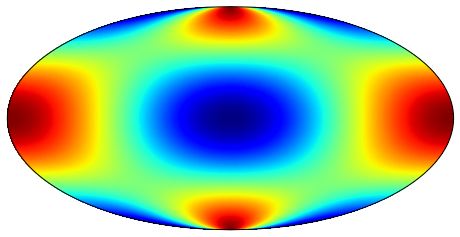

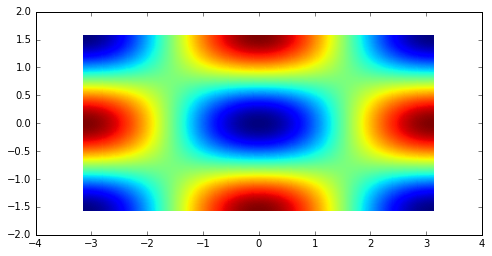

In [61]:
field2 = np.zeros((N, N / 2))

for j in xrange(0, N / 2):
    for i in xrange(0, N):
        x[i][j] = (2 * i - N) / float(N) * pi # x from -pi to pi
        y[i][j] = 2 * j / float(N) * pi - pi / 2 # y from -pi/2 to pi/2

field2 = np.zeros((N, N / 2))

for j in xrange(1, N / 2):

    theta = 2 * pi * j / float(N) # teta from 0 to pi

    F = complex128(np.zeros((N + 1)))
    F_ = complex128(np.zeros((N + 1)))

    func1 = 0.0
    func2 = 0.0

    for m in xrange(0, Lmax + 1):
        for l in xrange(m, Lmax + 1):
            func1 = func1 + a_coef[m][l]*(-sqrt(15/(8*pi)))*(cos(theta)**2 - sin(theta)**2)
            func2 = func2 + b_coef[m][l] * P_[j][m][l]

        F[m] = func1
        F_[m] = func2

        func1 = 0.0
        func2 = 0.0

    T = np.real(pyfftw.interfaces.numpy_fft.fft(F)) + np.imag(pyfftw.interfaces.numpy_fft.fft(F_))

    for i in xrange(0, N):
        field2[i][j] = T[i]

moll(x, y, field2)
flat(x, y, field2)

In [79]:
P_theta = np.zeros((N/2, Lmax + 1, Lmax + 1))
for j in xrange(1, N/2):

    theta = 2 * pi * j / float(N) # teta from 0 to pi

    for m in xrange(0, Lmax+1):
        for l in xrange(m, Lmax+1):
            c1 = sqrt(float((2 * l + 1) * (l + 1 + m)) / float((2 * l + 3) * (l + 1 - m)))
            #P_theta[j][m][l] = -(l+1)*(cos(theta)/sin(theta))*P_[j][m][l] + (1+l-m)*(1/sin(theta))*P_[j][m][l+1]*c1
            P_theta[j][m][l] = P_[j][m][l]

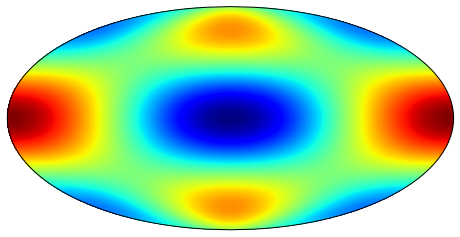

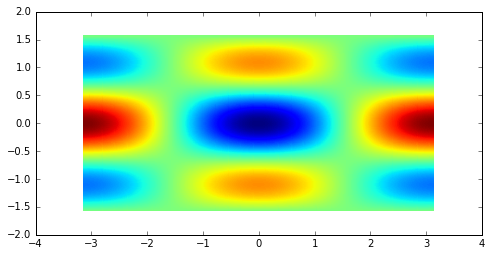

In [92]:
field1 = np.zeros((N, N / 2))

for j in xrange(0, N / 2):
    for i in xrange(0, N):
        x[i][j] = (2 * i - N) / float(N) * pi # x from -pi to pi
        y[i][j] = 2 * j / float(N) * pi - pi / 2 # y from -pi/2 to pi/2

field1 = np.zeros((N, N / 2))

for j in xrange(1, N / 2):

    theta = 2 * pi * j / float(N) # teta from 0 to pi

    F = complex128(np.zeros((N + 1)))
    F_ = complex128(np.zeros((N + 1)))

    func1 = 0.0
    func2 = 0.0

    for m in xrange(0, Lmax + 1):
        for l in xrange(m, Lmax + 1):
            func1 = func1 + a_coef[m][l] * P_[j][1][3]
            func2 = func2 + b_coef[m][l] * P_[j][1][3]

        F[m] = func1
        F_[m] = func2

        func1 = 0.0
        func2 = 0.0

    T = np.real(pyfftw.interfaces.numpy_fft.fft(F)) + np.imag(pyfftw.interfaces.numpy_fft.fft(F_))

    for i in xrange(0, N):
        field1[i][j] = T[i]

moll(x, y, field1)
flat(x, y, field1)

In [57]:
field1[5][0:6]

array([ 0.        ,  4.01815032,  4.01758344,  4.01663874,  4.01531636,
        4.0136165 ])

In [ ]:
field2[5][0:6]

In [ ]:
field[5][0:6]

In [ ]:
field1[5][0:6]

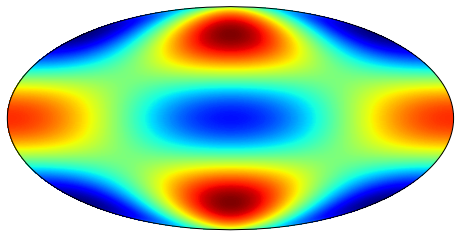

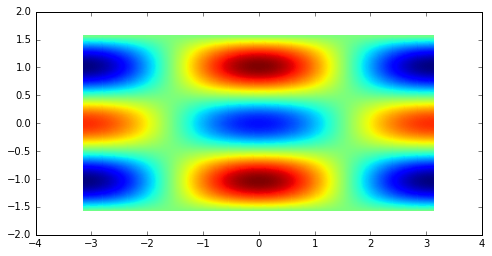

In [87]:
field3 = np.zeros((N, N / 2))

for j in xrange(0, N / 2):
    for i in xrange(0, N):
        x[i][j] = (2 * i - N) / float(N) * pi # x from -pi to pi
        y[i][j] = 2 * j / float(N) * pi - pi / 2 # y from -pi/2 to pi/2

field3 = np.zeros((N, N / 2))

for j in xrange(1, N / 2):

    theta = 2 * pi * j / float(N) # teta from 0 to pi

    F = complex128(np.zeros((N + 1)))
    F_ = complex128(np.zeros((N + 1)))

    func1 = 0.0
    func2 = 0.0

    for m in xrange(0, Lmax + 1):
        for l in xrange(m, Lmax + 1):
            func1 = func1 + a_coef[m][l] * (-1/8)*sqrt(21/pi)*sin(theta)*(5*cos(theta)**2 - 1)    
            func2 = func2 + b_coef[m][l] * P_theta[j][m][l]

        F[m] = func1
        F_[m] = func2

        func1 = 0.0
        func2 = 0.0

    T = np.real(pyfftw.interfaces.numpy_fft.fft(F)) + np.imag(pyfftw.interfaces.numpy_fft.fft(F_))

    for i in xrange(0, N):
        field3[i][j] = T[i]

moll(x, y, field3)
flat(x, y, field3)

In [88]:
field3[5][0:6]

array([ 0.        , -0.06342309, -0.12682589, -0.19018811, -0.25348946,
       -0.31670969])

In [89]:
field1[5][0:6]

array([ 0.        , -0.00623988, -0.01247729, -0.01870975, -0.02493479,
       -0.03114995])

In [90]:
P_2theta = np.zeros((N/2, Lmax + 1, Lmax + 1))
for j in xrange(1, N/2):

    c1 = sqrt(float((2 * l + 1) * (l + 1 + m)) / float((2 * l + 3) * (l + 1 - m)))
    c2 = sqrt(float((2 * l + 1) * (l + 1 + m) * (l + 2 + m)) / float((2 * l + 5) * (l + 1 - m) * (l + 2 - m)))
    c3 = sqrt(float((2 * l + 1) * (l + 1 + m) * (l + 2 + m) * (l + 3 + m)) / float(
        (2 * l + 7) * (l + 1 - m) * (l + 2 - m) * (l + 3 - m)))

    theta = 2 * pi * j / float(N) # teta from 0 to pi

    for m in xrange(0, Lmax+1):
        for l in xrange(m, Lmax+1):
            P_2theta[j][m][l] = 0.5*(1)**2 * ((1+l)*(3+l+(1+l)*cos(2*theta))*P_[j][m][l] + 2*(1+l+m)*(-2*(2+l)*cos(theta)*c1*P_[j][m][l+1] + (2+l-m)*c2*P_[j][m][l+2]))

In [ ]:
field4 = np.zeros((N, N / 2))

for j in xrange(0, N / 2):
    for i in xrange(0, N):
        x[i][j] = (2 * i - N) / float(N) * pi # x from -pi to pi
        y[i][j] = 2 * j / float(N) * pi - pi / 2 # y from -pi/2 to pi/2

field4 = np.zeros((N, N / 2))

for j in xrange(1, N / 2):

    theta = 2 * pi * j / float(N) # teta from 0 to pi

    F = complex128(np.zeros((N + 1)))
    F_ = complex128(np.zeros((N + 1)))

    func1 = 0.0
    func2 = 0.0

    for m in xrange(0, Lmax + 1):
        for l in xrange(m, Lmax + 1):
            func1 = func1 + a_coef[m][l] * P_2theta[j][m][l]
            func2 = func2 + b_coef[m][l] * P_2theta[j][m][l]

        F[m] = func1
        F_[m] = func2

        func1 = 0.0
        func2 = 0.0

    T = np.real(pyfftw.interfaces.nwumpy_fft.fft(F)) + np.imag(pyfftw.interfaces.numpy_fft.fft(F_))

    for i in xrange(0, N):
        field4[i][j] = T[i]

moll(x, y, field4)
flat(x, y, field4)

In [ ]:
field4[5][0:6]

In [ ]:
field5 = np.zeros((N, N / 2))

for j in xrange(0, N / 2):
    for i in xrange(0, N):
        x[i][j] = (2 * i - N) / float(N) * pi # x from -pi to pi
        y[i][j] = 2 * j / float(N) * pi - pi / 2 # y from -pi/2 to pi/2

field5 = np.zeros((N, N / 2))

for j in xrange(1, N / 2):

    theta = 2 * pi * j / float(N) # teta from 0 to pi

    F = complex128(np.zeros((N + 1)))
    F_ = complex128(np.zeros((N + 1)))

    func1 = 0.0
    func2 = 0.0

    for m in xrange(0, Lmax + 1):
        for l in xrange(m, Lmax + 1):
            func1 = func1 + a_coef[m][l] * (-sqrt(15/(8*pi))*(4*sin(theta)*cos(theta)))
            func2 = func2 + b_coef[m][l] * P_theta[j][m][l]

        F[m] = func1
        F_[m] = func2

        func1 = 0.0
        func2 = 0.0

    T = np.real(pyfftw.interfaces.numpy_fft.fft(F)) + np.imag(pyfftw.interfaces.numpy_fft.fft(F_))

    for i in xrange(0, N):
        field5[i][j] = T[i]

moll(x, y, field5)
flat(x, y, field5)

In [ ]:
field5[5][50:55]

In [ ]:
field4[5][50:55]

In [ ]:
field4 = np.zeros((N, N / 2))

for j in xrange(0, N / 2):
    for i in xrange(0, N):
        x[i][j] = (2 * i - N) / float(N) * pi # x from -pi to pi
        y[i][j] = 2 * j / float(N) * pi - pi / 2 # y from -pi/2 to pi/2

field4 = np.zeros((N, N / 2))

for j in xrange(1, N / 2):

    theta = 2 * pi * j / float(N) # teta from 0 to pi

    F = complex128(np.zeros((N + 1)))
    F_ = complex128(np.zeros((N + 1)))

    func1 = 0.0
    func2 = 0.0

    for m in xrange(0, Lmax + 1):
        for l in xrange(m, Lmax + 1):
            func1 = func1 + a_coef[m][l] * P_[j][m][l]
            func2 = func2 + b_coef[m][l] * P_2theta[j][m][l]

        F[m] = func1
        F_[m] = func2

        func1 = 0.0
        func2 = 0.0

    T = np.real(pyfftw.interfaces.numpy_fft.fft(F)) + np.imag(pyfftw.interfaces.numpy_fft.fft(F_))

    for i in xrange(0, N):
        field4[i][j] = T[i]

moll(x, y, field4)
flat(x, y, field4)

In [ ]:
field5 = np.zeros((N, N / 2))

for j in xrange(0, N / 2):
    for i in xrange(0, N):
        x[i][j] = (2 * i - N) / float(N) * pi # x from -pi to pi
        y[i][j] = 2 * j / float(N) * pi - pi / 2 # y from -pi/2 to pi/2

field5 = np.zeros((N, N / 2))

for j in xrange(1, N / 2):

    theta = 2 * pi * j / float(N) # teta from 0 to pi

    F = complex128(np.zeros((N + 1)))
    F_ = complex128(np.zeros((N + 1)))

    func1 = 0.0
    func2 = 0.0

    for m in xrange(0, Lmax + 1):
        for l in xrange(m, Lmax + 1):
            func1 = func1 + a_coef[m][l] * (-sqrt(15/(8*pi))*sin(theta)*cos(theta))
            func2 = func2 + b_coef[m][l] * P_2theta[j][m][l]

        F[m] = func1
        F_[m] = func2

        func1 = 0.0
        func2 = 0.0

    T = np.real(pyfftw.interfaces.numpy_fft.fft(F)) + np.imag(pyfftw.interfaces.numpy_fft.fft(F_))

    for i in xrange(0, N):
        field5[i][j] = T[i]

moll(x, y, field5)
flat(x, y, field5)

In [ ]:
field4[5][50:55]

In [ ]:
field5[5][50:55]

In [ ]:
sum1 = 0.0

teta = y + pi / 2 * (N / 4) * 4 / float(N)

for i in xrange(0, N / 2):
    for j in xrange(1, N / 2):
        sum1 = sum1 + sin(teta[i][j]) * (field5[i][j]) ** 2

for i in xrange(N / 2 + 1, N):
    for j in xrange(1, N / 2):
        sum1 = sum1 + sin(teta[i][j]) * (field5[i][j]) ** 2
print sum1

In [ ]:
print 1/sqrt(10298.9193385/13241.4677209)
print 1/(10298.9193385/13241.4677209)

In [ ]:
field4 = np.zeros((N, N / 2))

for j in xrange(0, N / 2):
    for i in xrange(0, N):
        x[i][j] = (2 * i - N) / float(N) * pi # x from -pi to pi
        y[i][j] = 2 * j / float(N) * pi - pi / 2 # y from -pi/2 to pi/2

field4 = np.zeros((N, N / 2))

for j in xrange(1, N / 2):

    theta = 2 * pi * j / float(N) # teta from 0 to pi

    F = complex128(np.zeros((N + 1)))
    F_ = complex128(np.zeros((N + 1)))

    func1 = 0.0
    func2 = 0.0

    for m in xrange(0, Lmax + 1):
        for l in xrange(m, Lmax + 1):
            func1 = func1 + a_coef[m][l] * P_theta[j][m][l]
            func2 = func2 + b_coef[m][l] 

        F[m] = func1
        F_[m] = func2

        func1 = 0.0
        func2 = 0.0

    T = np.real(pyfftw.interfaces.numpy_fft.fft(F)) + np.imag(pyfftw.interfaces.numpy_fft.fft(F_))

    for i in xrange(0, N):
        field4[i][j] = T[i]

moll(x, y, field4)
flat(x, y, field4)

In [ ]:
field5 = np.zeros((N, N / 2))

for j in xrange(0, N / 2):
    for i in xrange(0, N):
        x[i][j] = (2 * i - N) / float(N) * pi # x from -pi to pi
        y[i][j] = 2 * j / float(N) * pi - pi / 2 # y from -pi/2 to pi/2

field5 = np.zeros((N, N / 2))

for j in xrange(1, N / 2):

    theta = 2 * pi * j / float(N) # teta from 0 to pi

    F = complex128(np.zeros((N + 1)))
    F_ = complex128(np.zeros((N + 1)))

    func1 = 0.0
    func2 = 0.0

    for m in xrange(0, Lmax + 1):
        for l in xrange(m, Lmax + 1):
            func1 = func1 + a_coef[m][l] * (-sqrt(15/(8*pi))*cos(2*theta))
            func2 = func2 + b_coef[m][l]

        F[m] = func1
        F_[m] = func2

        func1 = 0.0
        func2 = 0.0

    T = np.real(pyfftw.interfaces.numpy_fft.fft(F)) + np.imag(pyfftw.interfaces.numpy_fft.fft(F_))

    for i in xrange(0, N):
        field5[i][j] = T[i]

moll(x, y, field5)
flat(x, y, field5)

In [91]:
P_ = np.zeros((N / 2, Lmax + 4, Lmax + 4))
for j in xrange(1, N / 2):

    teta = 2 * pi * j / float(N)  # teta from 0 to pi

    P_[j][0][0] = 1 / sqrt(4 * pi)

    for m in xrange(1, Lmax + 4):
        P_[j][m][m] = P_[j][m - 1][m - 1] * (-sin(teta)) * sqrt(2 * m + 1) / sqrt(2 * m)

    for m in xrange(0, Lmax + 3):
        P_[j][m][m + 1] = P_[j][m][m] * cos(teta) * sqrt(2 * m + 3)

    for m in xrange(0, Lmax + 2):
        for l in xrange(m + 2, Lmax + 4):
            P_[j][m][l] = sqrt(4 * l * l - 1) / sqrt(l * l - m * m) * cos(teta) * P_[j][m][l - 1] - P_[j][m][
                                                                                                        l - 2] * sqrt(
                (2 * l + 1) * (l - 1 - m) * (l - m) * (l + m - 1) / (l + m) / (2 * l - 3))